In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics


Loading Data, whenever you change the dataset, you need to reexecute this cell

---------------------------------------
Affichage données initiales            R15.arff


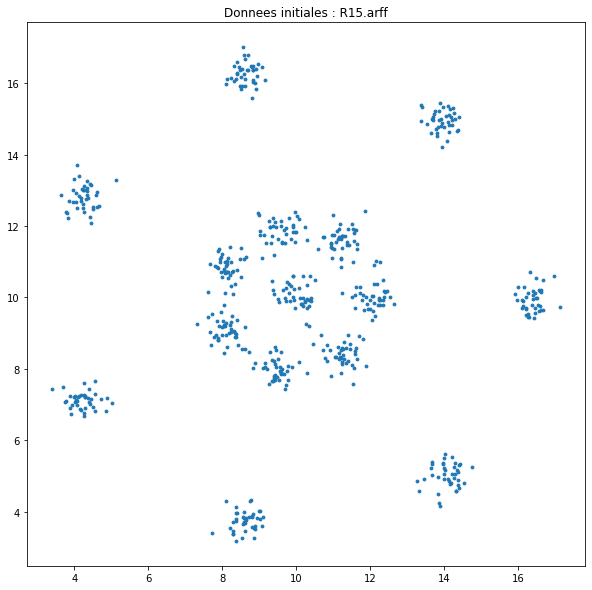

In [45]:
path = './artificial/'
name="R15.arff"

databrut = arff.loadarff(open(path+str(name), 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])

print("---------------------------------------")
print("Affichage données initiales            "+ str(name))
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne
plt.figure(figsize=(10, 10))
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales : "+ str(name))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

First of All, let's iterate over the number of clusters to find the best solution for The Xclara Data set

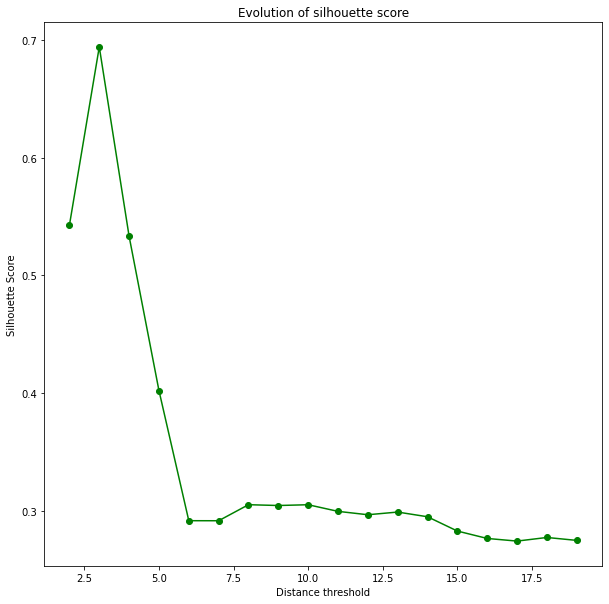

In [14]:
temps = []
scores = []
for d in range(2,20):
  tps1 = time.time()
  model = cluster.AgglomerativeClustering(linkage='ward', n_clusters=d)
  model = model.fit(datanp)
  tps2 = time.time()
  temps.append(round((tps2 - tps1)*1000,2))
  labels = model.labels_
  labels = model.labels_
  # Nb iteration of this method
  kres = model.n_clusters_
  leaves=model.n_leaves_
  silhouetteScore = metrics.silhouette_score(datanp,labels)
  scores.append(silhouetteScore)
  
plt.figure(figsize=(10, 10))
plt.title("Evolution of silhouette score")
plt.xlabel("Distance threshold")
plt.ylabel("Silhouette Score")
plt.plot(range(2,20),scores,'g-o')

plt.show()

The graph shows that for the Xclara dataset, the best sikhouette score is reached with a number of clusters of 3.

In the following cells, we will perform an iteration with a range between 2 and 50 clusters to try and compare the different outcomes :
  -The score of the clustering to check chich linkage is more precise 
  -In the second time, we will compare different metric used in the agglomerative clustering to see which one of them is the greedier
  

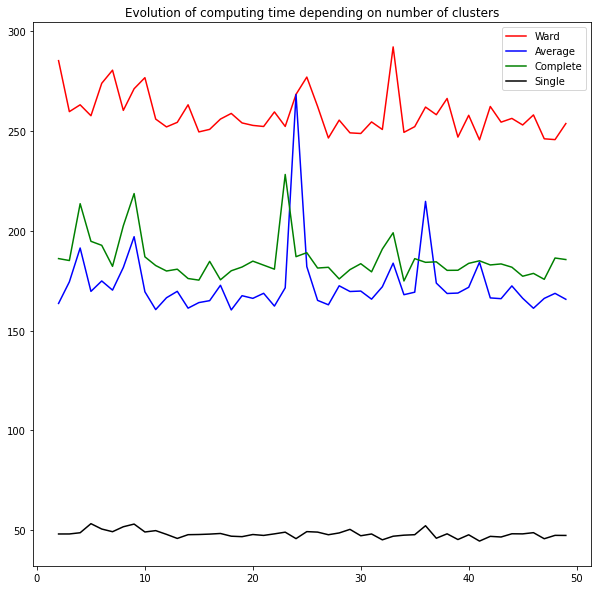

In [23]:
tempsWard=[]
tempsAverage =[]
tempsComplete = []
tempsSingle = []
for k in range(2,50):
  #Calcul temps pour linkage ward
  tps1 = time.time()
  model = cluster.AgglomerativeClustering( linkage='ward', n_clusters=k)
  model = model.fit(datanp)
  tps2 = time.time()
  tempsWard.append(round((tps2 - tps1)*1000,2))
  
  #Calcul temps pour linkage average
  tps1 = time.time()
  model = cluster.AgglomerativeClustering(linkage='average', n_clusters=k)
  model = model.fit(datanp)
  tps2 = time.time()
  tempsAverage.append(round((tps2 - tps1)*1000,2))


  #Calcul du temps linkage Complete
  tps1 = time.time()
  model = cluster.AgglomerativeClustering(linkage='complete', n_clusters=k)
  model = model.fit(datanp)
  tps2 = time.time()
  tempsComplete.append(round((tps2 - tps1)*1000,2))


  #Calcul temps linkage single
  tps1 = time.time()
  model = cluster.AgglomerativeClustering(linkage='single', n_clusters=k)
  model = model.fit(datanp)
  tps2 = time.time()
  tempsSingle.append(round((tps2 - tps1)*1000,2))
  
plt.figure(figsize=(10,10))
plt.title("Evolution of computing time depending on number of clusters")
plt.plot(range(2,50),tempsWard,'r',label='Ward')
plt.plot(range(2,50),tempsAverage,'b',label='Average')
plt.plot(range(2,50),tempsComplete,'g',label='Complete')
plt.plot(range(2,50),tempsSingle,'k',label='Single')
plt.legend()
plt.show()

We will now test different configuration of linkages, metrics and other parameters to quantify the differences in terms of computation time. By modifying the metric used, we won't be analyzing the Ward method as the Ward method uses exclusively a euclidian metric.

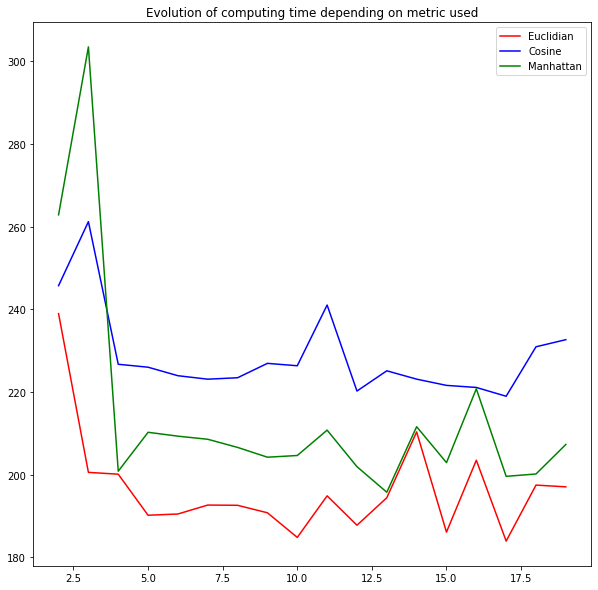

In [32]:
tempsAvgEuclidian=[]
tempsAvgl2=[]
tempsAvgCosine=[]
tempsAvgManhatan=[]

for k in range(2,20):
    #Average linkage with euclidian metric
    tps1 = time.time()
    model = cluster.AgglomerativeClustering( linkage='average', n_clusters=k)
    model = model.fit(datanp)
    tps2 = time.time()
    tempsAvgEuclidian.append(round((tps2 - tps1)*1000,2))

    #Average linkage with euclidian metric
    tps1 = time.time()
    model = cluster.AgglomerativeClustering(n_clusters=k,linkage='average',affinity='manhattan')
    model = model.fit(datanp)
    tps2 = time.time()
    tempsAvgManhatan.append(round((tps2 - tps1)*1000,2))

        #Average linkage with euclidian metric
    tps1 = time.time()
    model = cluster.AgglomerativeClustering( linkage='average', n_clusters=k, affinity="cosine")
    model = model.fit(datanp)
    tps2 = time.time()
    tempsAvgCosine.append(round((tps2 - tps1)*1000,2))

plt.figure(figsize=(10,10))
plt.title("Evolution of computing time depending on metric used")
plt.plot(range(2,20),tempsAvgEuclidian,'r',label='Euclidian')
plt.plot(range(2,20),tempsAvgCosine,'b',label='Cosine')
plt.plot(range(2,20),tempsAvgManhatan,'g',label='Manhattan')
plt.legend()
plt.show()





Let's now Check the difference of the result depending on the metric used. We know for R15 that the correct number of cluster is 15.

In [49]:
def agg_clustering(data, num_clusters, metric,linkage):
    cluster_model = cluster.AgglomerativeClustering(n_clusters=num_clusters,
                                            affinity=metric,
                                            linkage=linkage)
 
    clusters = cluster_model.fit_predict(data)
 
    score = metrics.silhouette_score(data,
                             cluster_model.labels_,
                             metric='euclidean')
    return clusters, score

In [50]:

y_euclidean, euclidean_score = agg_clustering(datanp, 15, 'euclidean','average')
y_l1, l1_score = agg_clustering(datanp, 15, 'l1','average')
y_l2, l2_score = agg_clustering(datanp, 15, 'l2','average')
y_manhattan, manhattan_score = agg_clustering(datanp, 15, 'manhattan','average')
y_cosine, cosine_score = agg_clustering(datanp, 15, 'cosine','average')


<BarContainer object of 5 artists>

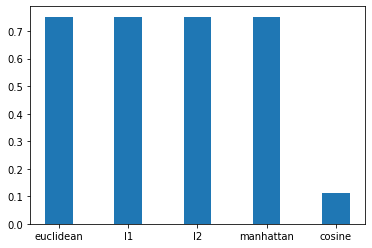

In [51]:

silhouette_scores = {'euclidean': euclidean_score,
                     'l1': l1_score,
                     'l2': l2_score,
                     'manhattan': manhattan_score,
                     'cosine': cosine_score}
plt.bar(list(silhouette_scores.keys()),
        list(silhouette_scores.values()),
        width=0.4)

We can clearly see that the cosine metric is not efficient when using agglomerative Clusering.

Two datasets that can be clustered by Agglomerative clustering : "diamond9" , "R15"
Two datasets that can not be clustered by Agglomerative clustering : "banana" , "2d-4c-no4"

In [54]:
def readAndPLot(name):
  databrut = arff.loadarff(open(path+str(name), 'r'))
  datanp = np.array([[x[0],x[1]] for x in databrut[0]])

  print("---------------------------------------")
  print("Affichage données initiales            "+ str(name))
  f0 = datanp[:,0] # tous les élements de la première colonne
  f1 = datanp[:,1] # tous les éléments de la deuxième colonne
  plt.figure(figsize=(10, 10))
  plt.scatter(f0, f1, s=8)
  plt.title("Donnees initiales : "+ str(name))
  #plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
  plt.show()
  return datanp

In [97]:
def computeIterativeAgglomerative(data):
  tempsWard=[]
  tempsAverage =[]
  tempsComplete = []
  tempsSingle = []

  scoreWard = []
  scoreAvg = []
  scoreComp = []
  scoreSingle = []

  ##Add the score for each method
  ##For each method of linkage, depending on the metric used computional time
  for k in range(2,50):
    #Calcul temps pour linkage ward
    tps1 = time.time()
    model1 = cluster.AgglomerativeClustering( linkage='ward', n_clusters=k)
    model1 = model1.fit(data)
    tps2 = time.time()
    tempsWard.append(round((tps2 - tps1)*1000,2))
    scoreWard.append(metrics.silhouette_score(data,model1.labels_))
    
    #Calcul temps pour linkage average
    tps1 = time.time()
    model2 = cluster.AgglomerativeClustering(linkage='average', n_clusters=k)
    model2 = model2.fit(data)
    tps2 = time.time()
    tempsAverage.append(round((tps2 - tps1)*1000,2))
    scoreAvg.append(metrics.silhouette_score(data,model2.labels_))


    #Calcul du temps linkage Complete
    tps1 = time.time()
    model3 = cluster.AgglomerativeClustering(linkage='complete', n_clusters=k)
    model3 = model3.fit(data)
    tps2 = time.time()
    tempsComplete.append(round((tps2 - tps1)*1000,2))
    scoreComp.append(metrics.silhouette_score(data,model3.labels_))


    #Calcul temps linkage single
    tps1 = time.time()
    model = cluster.AgglomerativeClustering(linkage='single', n_clusters=k)
    model = model.fit(data)
    tps2 = time.time()
    tempsSingle.append(round((tps2 - tps1)*1000,2))
    silhouetteScore = metrics.silhouette_score(data,model.labels_)
    scoreSingle.append(silhouetteScore)
    

  plt.title("Evolution of the Score depending on number of clusters")
  plt.plot(range(2,50),scoreWard,'r',label='Ward')
  plt.plot(range(2,50),scoreAvg,'b',label='Average')
  plt.plot(range(2,50),scoreComp,'g',label='Complete')
  plt.plot(range(2,50),scoreSingle,'k',label='Single')
  plt.legend()
  plt.show()

In [120]:
def plotResultCluster(data,best_cluster):
  model = cluster.AgglomerativeClustering(linkage='ward', n_clusters=best_cluster)
  model.fit(data)
  labels = model.labels_
  plt.scatter(data[:,0], data[:,1], c=labels, s=8)
  plt.title("Clustering agglomératif (average, n_cluster= "+str(best_cluster)+ ")")
  plt.show()
  print("nb clusters =",best_cluster,", nb feuilles = ", leaves)

---------------------------------------
Affichage données initiales            spherical_6_2.arff


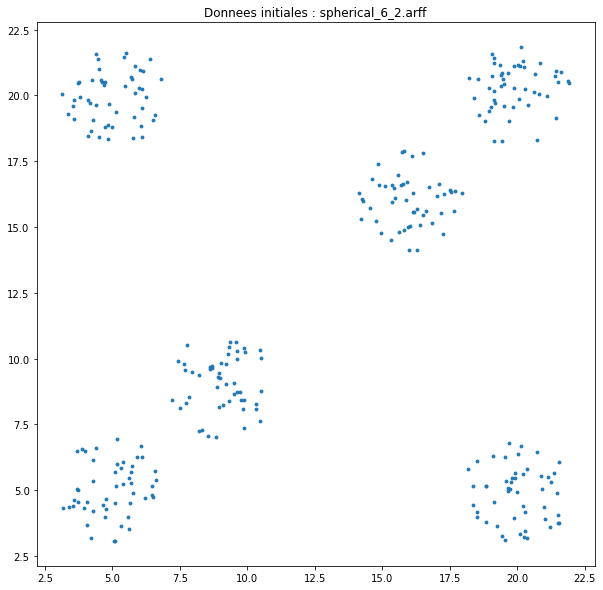

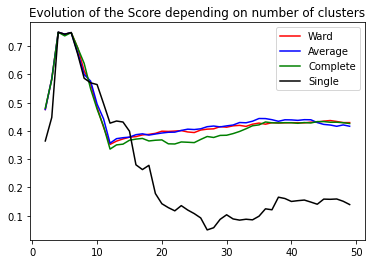

In [118]:
spherical = readAndPLot("spherical_6_2.arff")
computeIterativeAgglomerative(spherical)

As we can see the best cluster solution is for a number of 6 clusters

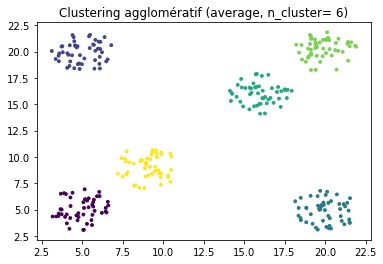

nb clusters = 6 , nb feuilles =  3000


In [121]:
plotResultCluster(spherical,6)

---------------------------------------
Affichage données initiales            R15.arff


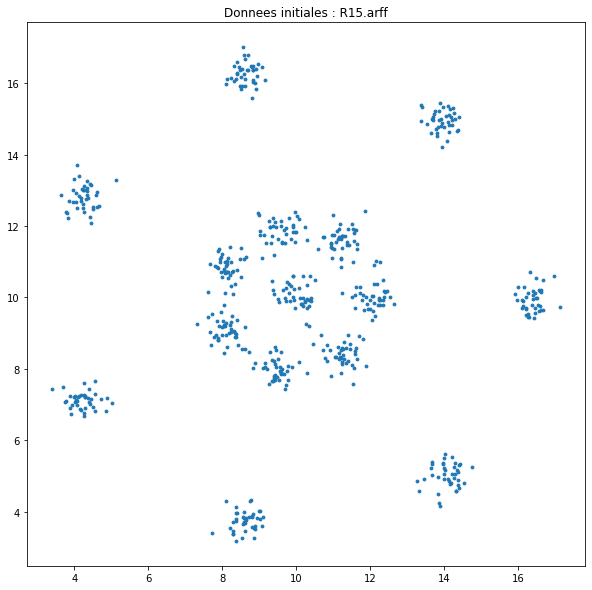

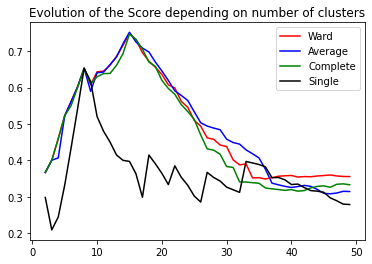

In [122]:
r15 = readAndPLot("R15.arff")
computeIterativeAgglomerative(r15)

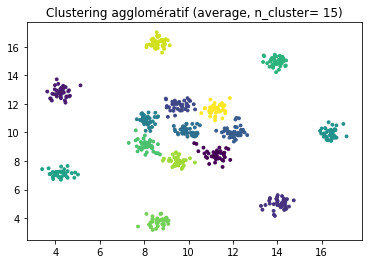

nb clusters = 15 , nb feuilles =  3000


In [123]:
plotResultCluster(r15,15)

---------------------------------------
Affichage données initiales            banana.arff


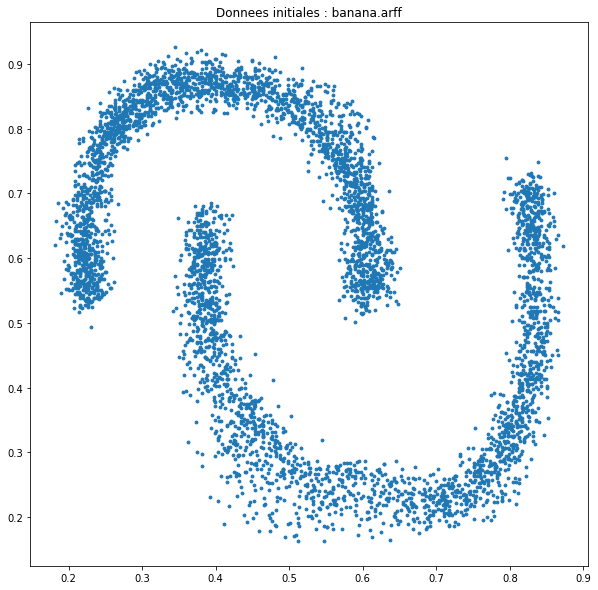

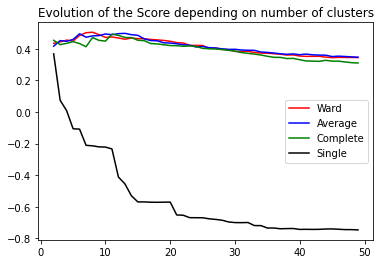

In [124]:
banana = readAndPLot("banana.arff")
computeIterativeAgglomerative(banana)


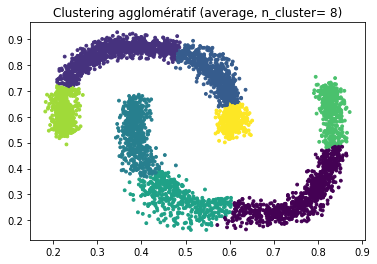

nb clusters = 8 , nb feuilles =  3000


In [125]:
plotResultCluster(banana,8)

---------------------------------------
Affichage données initiales            donut1.arff


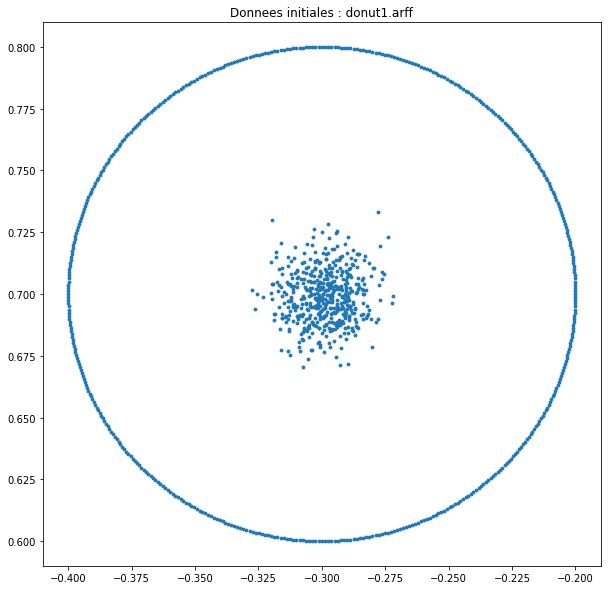

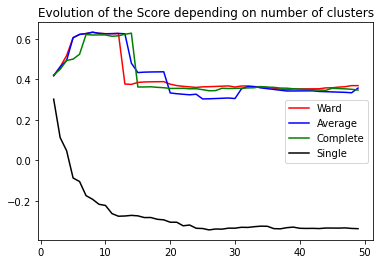

In [131]:
donut = readAndPLot("donut1.arff")
computeIterativeAgglomerative(donut)

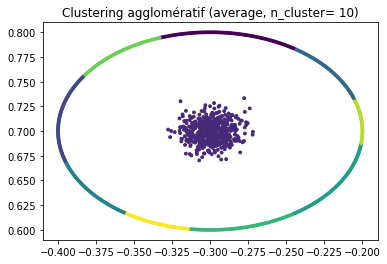

nb clusters = 10 , nb feuilles =  3000


In [132]:
plotResultCluster(donut,10)